#Проект: Классификация видов ириса (Iris Dataset)
**Описание**:
В данном проекте мы изучаем классический датасет Iris (цветок Ирис). Цель - предсказать вид ириса (Setosa, Versicolor, Virginica) по 4 признакам:

- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

**Основные этапы**
1. Загрузка и исследование данных (размеры, статистики).
2. Визуализация (гистограммы, pairplot) и выводы.
3. Подготовка данных (train/test split).
4. Обучение моделей (LogisticRegression, KNN, DecisionTree).
5. Оценка качества (accuracy_score, confusion_matrix, classification_report).

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем датасет Iris из sklearn
from sklearn.datasets import load_iris

# Загружаем данные Iris
iris = load_iris()

# Посмотрим, что есть в этом объекте iris
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# Преобразуем данные в DataFrame, добавляем целевую переменную
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

In [ ]:
# Проверяем первые строки
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Смотрим размер датафрейма
df.shape

(150, 5)

In [ ]:
# Смотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Смотрим статистику
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Смотрим сколько классов имеется
unique_targets = df['target'].unique()
print(unique_targets)

[0 1 2]


In [ ]:
# загружаем нужные библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

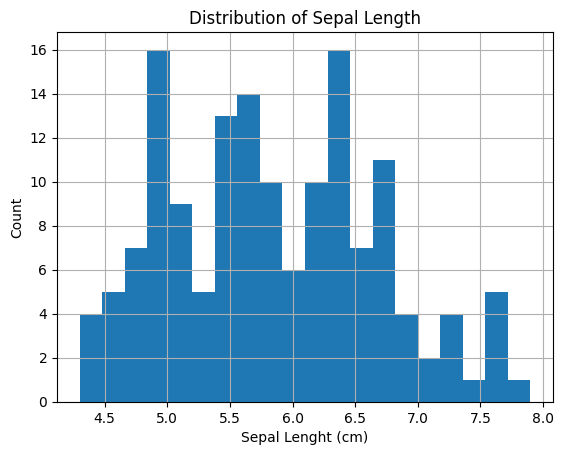

In [ ]:
# Строим гистограмму для Sepal Lenght (cm)
df['sepal length (cm)'].hist(bins=20)
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Count')
plt.title('Distribution of Sepal Length')
plt.show()

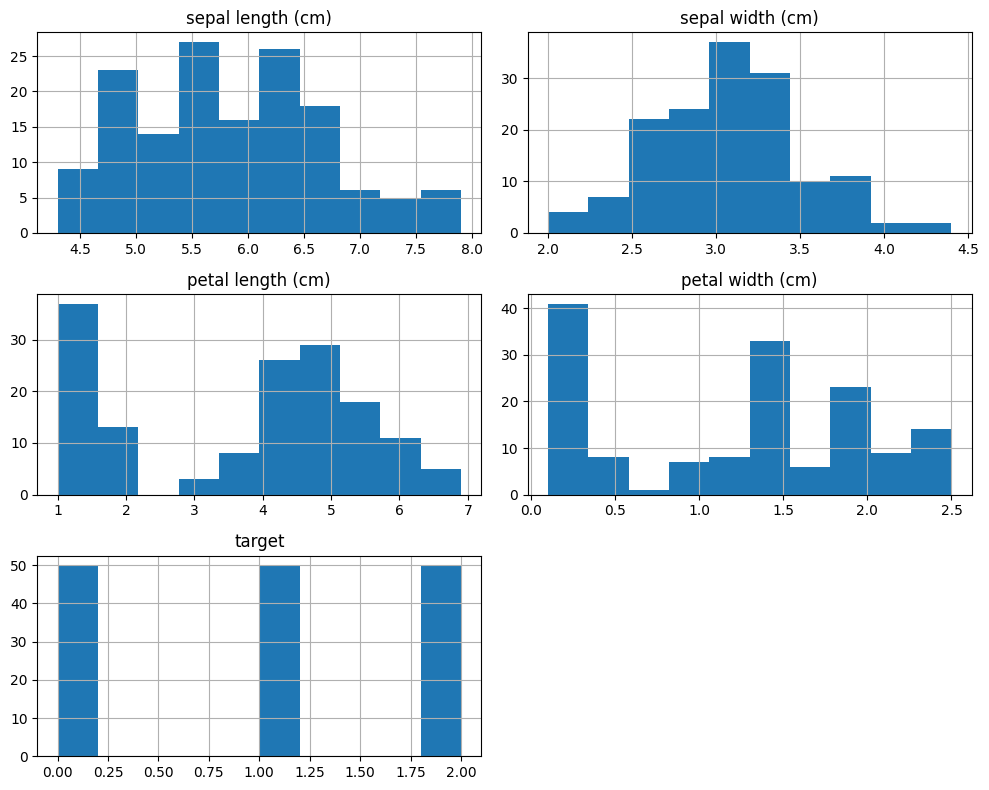

In [ ]:
# Строим гистограммы для всех признаков
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
# Заменям числовые метки классов на их реальные имена
species_names = iris['target_names']
df['species'] = df['target'].apply(lambda x: species_names[x])

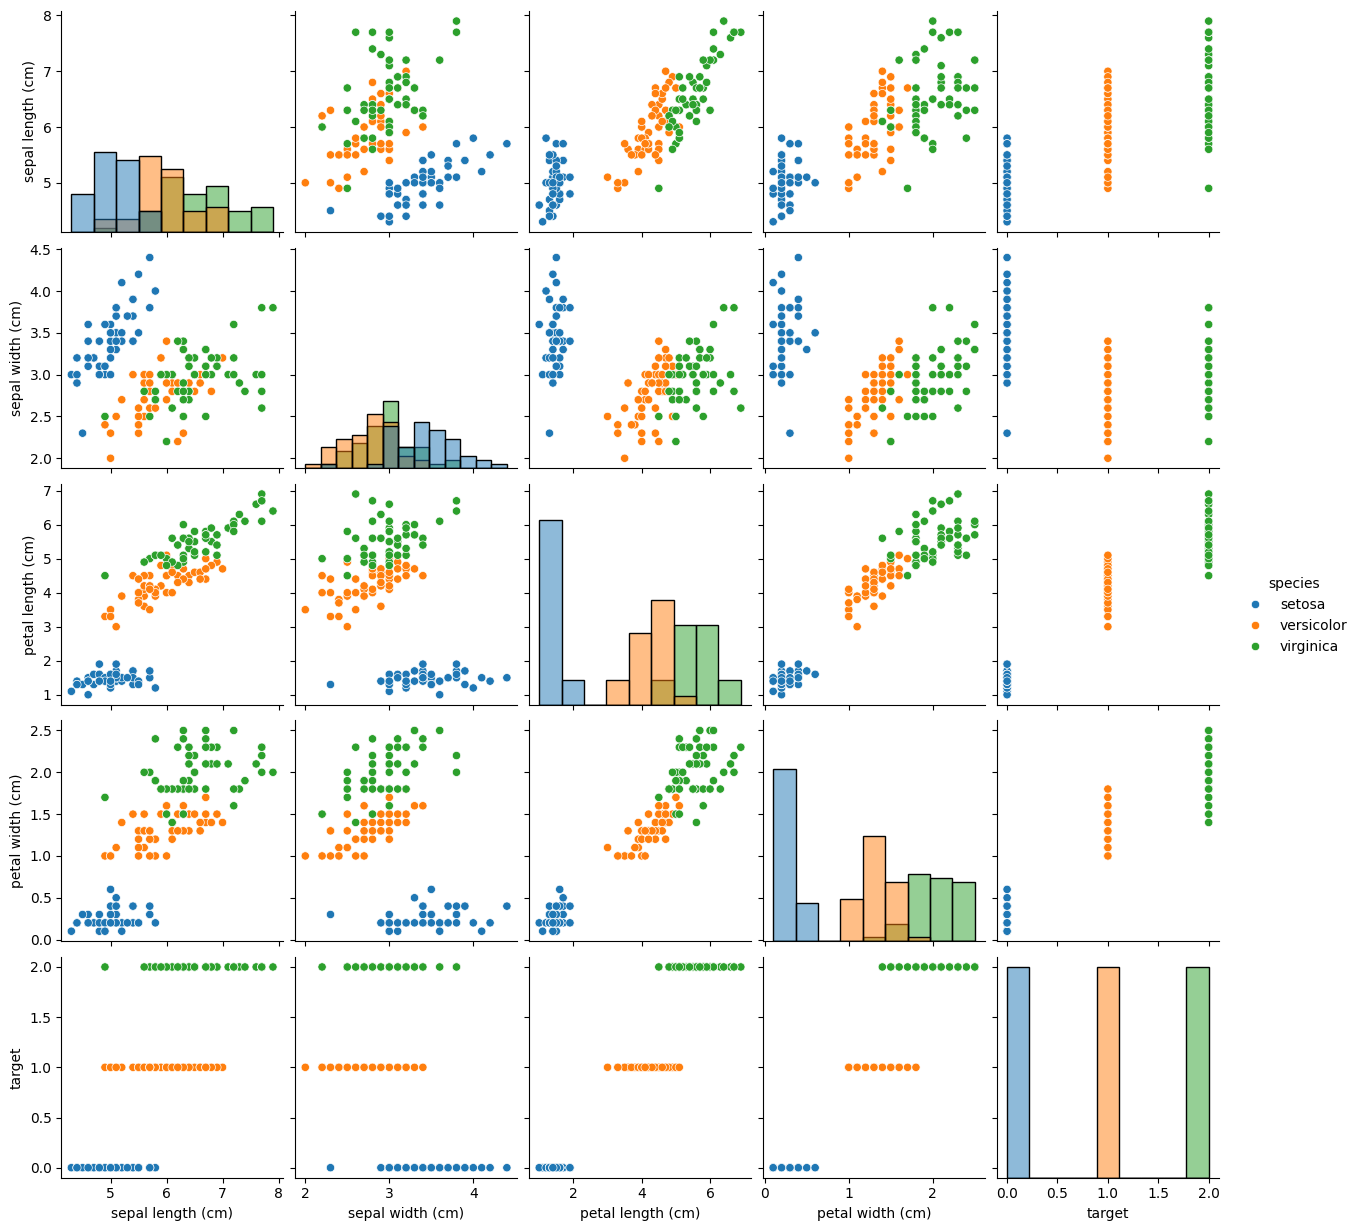

In [ ]:
# Строим гистограммы, pairplot, чтобы понять распределение.
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()
#На этой диаграмме можно увидеть зависимости признаков друг от друга
#Например если посмотреть на диаграмму где показаны petal length и petal width, можно заметить определенную линейную зависимость
# Чем больше значение petal length тем выше значение petal width и так далее
# Так же если посмотреть на диагональные диаграммы можно увидеть гистограмму, где показаны как данные распеределяются

In [ ]:
# Подготавливаем данные для обучения. Присваеваем X и y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

In [ ]:
# Разбиваем данные, оставляя 20% на проверку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Смотрим размеры разделенных данных
print("Train features shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train features shape: (120, 4)
Train labels shape: (120,)
Test features shape: (30, 4)
Test labels shape: (30,)


In [ ]:
# Загружаем LogisticRegression из библиотеки
from sklearn.linear_model import LogisticRegression

In [ ]:
# Задаем максимальное количество итерации для опримизации
model = LogisticRegression(max_iter=200)
# Принцип работы логистической регрессии
# 1. Рассчитывается z (точно также как в линейной регрессии)
# 2. С помощью сигмоидной функции z конвертируется в вероятность
# 3. Для того чтобы обучить модель находится loss которая показывает насколько модель ошибается
# 4. Для нахождения градиента находится производная от loss
# 5. Если классов несколько есть два варианта 1 - OvR One vs Rest 2 - softmax
#   OvR работает как бинарный классификатор 1 против всех и выбирает класс с самым большим значением (находит вероятность для каждого класса отдельно не зависимо от других классов)
#   softmax использует все экспоненты всех классов для нахождения верояности и тоже выбирает класс с максимальной вероятностью

In [ ]:
# Обучение модели
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [ ]:
# Оценка модели
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)

#работает по принципу ближайшего значения. n_neighbor определят сколько ближайших будет рассматриваться. И нужный ответ выбирается голосование большинства

KNN Accuracy: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", tree_acc)

# Работает по принципу ветвей. Каждая ветвь это этап. В каждом этапе выбирается признак и условие (порог). Процесс продолжается рекурсивно. Пока не останется данные которые относятся к одному классу.
# Для того чтобы выбрать признак и порог модель пробует разделить данные по каждому признаку и по разным попрогам. Пороги выбираются как средние двух значении отсортированных данных
# Весь вышеперечисленный процесс и есть обучение модели
# Когда к модели поступят новые данные, она предскажет результат на основе дерева которую построила ранее

Decision Tree Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_model, X, y, cv=5)
print("KNN Cross-validation scores:", scores)
print("KNN Mean CV score:", scores.mean())
# cross_val_score делит данные на 5 частей (фолды). Одна часть используется как тестовые данные, а остальные как обучающие. Для каждого фолда модель будет обучаться на обучающих данных и тестироваться на тестовых

KNN Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
KNN Mean CV score: 0.9733333333333334


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model, X, y, cv=5)
print("KNN Cross-validation scores:", scores)
print("KNN Mean CV score:", scores.mean())

KNN Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
KNN Mean CV score: 0.9533333333333334


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# строки в матрице показывают и разделяют данные по классам. Например 1 строка это информация о классе 0
# колонки показывает ошибку или правильность данных
# для класса 0 праильные ответы это первая колонна, а остальные это ошибки. Например если в первой строке во второй колонне написано 3, то это значит что модель ошибочно определило запись к классу 1 хотя она относиться к 0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=iris['target_names'])
print("Classification Report: \n", report)
# Precision (Точность предсказаний) показывает долю правильных положительных предсказании среди всех положительно-правильных предсказании и положительно ложных пердсказании (правильных и ложных) tp/(tp+fp)
# это значение важно когда важно минимизировать количество ошибок

# Recall (Полнота) показывает долю положительных правильных предсказании среди всех фактически положительных ответов (все данные в датафрейме которые имеют фактически праильные результаты) tp/(tp+fn)
# это значение важно когда нужно минимизировать долю пропусков положительных результатов
# например, спам-фильтр: нужно минимизировать пропуск нормальных писем
# например, диагностика рака

# F1-Score - это среднее значение между precision и recall
# f1 = 2 * (precision*recall)/(precision + recall)
# F1-Score нужен, если важно учитывать как Precision, так и Recall.
# Особенно полезен, когда данные несбалансированы (например, один класс встречается чаще другого).
# использует горманическое среднее больше слоняется к минимуму

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_knn, target_names=iris['target_names'])
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Результаты метрик: LogisticRegression, KNN, DecisionTree дали высокую точность 100%
Датасет Iris небольшой и хорошо отделим признаками
Основные сложности: миимальный для Iris, поэтому практически "идеальный" результат.


##Итоговые выводы

1. **Точность моделей**
- LogisticRegression: 100%
- KNN: 100%
- DrcisionTree: 100%

2. **Причины высокой точности**
- Датасет Iris небольшой (150 образцев).
- Признаки (особенно длин/ширина лепестков) хоорошо разделяют классы.
- Даже простые модели без настройки гиперпараметров показыват отличные результаты.

3. **Дальнейшие шаги**
- Попробывать более сложные датасеты (Kaggle, UCI Machine Learning).
- Добавить регуляризацию и подбор параметров (GridSearchCV).
- Изучить РСА для визуализации многомерных данных.